# NYC Incidents Responded to by Fire Companies - Exploratory Data Analysis Project



![](https://storage.googleapis.com/kaggle-datasets-images/31379/41091/dd5288bd3357be68f20cef79c11bfe50/dataset-cover.jpg?t=2018-06-21-17-16-27)

Exploratory Data Analysis (EDA) is the process of exploring, investigating and gathering insights from data using statistical measures and visualizations. The objective of EDA is to develop and understanding of data, by uncovering trends, relationships and patterns. 

EDA is both a science and an art. On the one hand it requires the knowledge of statistics, visualization techniques and data analysis tools like Numpy, Pandas, Seaborn etc. On the other hand, it requires asking interesting questions to guide the investigation and interpreting numbers & figures to generate useful insights.

## Initial Notebook Setup with Google Colab and Jovian.

In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian

In [4]:
# Execute this to save new versions of the notebook
jovian.commit(project="project-2-nyc-fire-incidents-analysis")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pramation/project-2-nyc-fire-incidents-analysis


'https://jovian.ai/pramation/project-2-nyc-fire-incidents-analysis'

## Install the required libraries

In [5]:
!pip install numpy pandas==1.1.5 wordcloud jovian opendatasets geopandas matplotlib==3.1.3 seaborn plotly folium --upgrade --quiet

     |████████████████████████████████| 9.5 MB 5.0 MB/s 
     |████████████████████████████████| 366 kB 73.3 MB/s 
     |████████████████████████████████| 1.0 MB 53.2 MB/s 
     |████████████████████████████████| 13.1 MB 34.2 MB/s 
     |████████████████████████████████| 15.2 MB 40.6 MB/s 
     |████████████████████████████████| 95 kB 3.1 MB/s 
     |████████████████████████████████| 6.3 MB 41.9 MB/s 
     |████████████████████████████████| 16.7 MB 32.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.12.1.post1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


## NYC Incident Response of Fire Department - Exaploratory Analysis

We will explore and analyze NewYork City's fire incidents and the response by the Fire Department units in different part of the city. This will analyze the performance of the Fire Department's response and potential improvements needed.  

Three Datasets are used for this project.  
  1.  NYC incident response details from https://kaggle.com. This includes metadata file which has the column names and their descriptions. The incident details file has about 2.5 million records and 24 columns. This file has important information, such as - Location, cause and action taken about the incident. It also has response time and time taken to resolve the incident. This is the primary dataset for our analysis.  
  2.  NYC GeoJson file from https://kaggle.com. This has the geographical bounderies of each zipcode within New York City. This is used to represent incident volume per zipcode on the city map.  
  3.  NYC zipcodes shapefile with geometry information from https://opendata.cityofnewyork.us. This file is used to display information when we hover over the map.  


## Outline of tasks performed.  
1. Download data. unzip the file if required and make it ready to be consumed by the Pandas dataframe.
2. Create dataframes from the raw dataset file.
3. Perform data preparation & cleaning
4. Perform exploratory analysis & visualization.
5. Questions and Answers
6. Summary and Conclusion.


## Download Datasets

In [6]:
import opendatasets as od # Used to download Dataset files

In [7]:
# Download fire incidents details file. Primary source of the data for analusis.
data_url="https://www.kaggle.com/datasets/new-york-city/nyc-incidents-responded-to-by-fire-companies/download"
od.download(data_url)
# Download GeoJson file, gives boundaries for each zipcode on the New York City map. Used to visualize NYC map.
nyc_GeoJson_url="https://www.kaggle.com/datasets/saidakbarp/nyc-zipcode-geodata/download"
od.download(nyc_GeoJson_url)
# Download shape file, gives boundaries for each zipcode on the New York City map and addition information to be displayed as tooltip.
geojson_shapefile_url='https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip'
od.download(geojson_shapefile_url)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pramation
Your Kaggle Key: ··········


100%|██████████| 97.2M/97.2M [00:01<00:00, 52.1MB/s]



Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pramation
Your Kaggle Key: ··········


100%|██████████| 540k/540k [00:00<00:00, 77.2MB/s]

1515520it [00:00, 2988358.17it/s]


#### Unzip downloaded files.

In [8]:
!unzip /content/ZIP_CODE_040114.zip

Archive:  /content/ZIP_CODE_040114.zip
  inflating: ZIP_CODE_040114.shx     
  inflating: ZIP_CODE_040114.dbf     
  inflating: ZIP_CODE_040114.prj     
  inflating: ZIP_CODE_040114.sbn     
  inflating: ZIP_CODE_040114.sbx     
  inflating: ZIP_CODE_040114.shp     
  inflating: ZIP_CODE_040114.shp.xml  


## Create DataFrames to capture the metadata Information and also to capture the incident details. 


In [97]:
import pandas as pd  # To create dataframes
import numpy as np   # To perform numerical operations

`nyc_schema_df` Dataframe will have column names and their descriptions used in the NYC incidents details dataset.

In [98]:
nyc_schema_df=pd.DataFrame({'Column_Name':
['IM_INCIDENT_KEY',
'FIRE_BOX',
'INCIDENT_TYPE_DESC',
'INCIDENT_DATE_TIME',
'ARRIVAL_DATE_TIME',
'UNITS_ONSCENE',
'LAST_UNIT_CLEARED_DATETIME',
'HIGHEST_LEVEL_DESC',
'TOTAL_INCIDENT_DURATION',
'ACTION_TAKEN1_DESC',
'ACTION_TAKEN2_DESC',
'ACTION_TAKEN3_DESC',
'PROPERTY_USE_DESC',
'STREET_HIGHWAY',
'ZIP_CODE',
'BOROUGH_DESC',
'FLOOR',
'CO_DETECTOR_PRESENT_DESC',
'FIRE_ORIGIN_BELOW_GRADE_FLAG',
'STORY_FIRE_ORIGIN_COUNT',
'FIRE_SPREAD_DESC',
'DETECTOR_PRESENCE_DESC',
'AES_PRESENCE_DESC',
'STANDPIPE_SYS_PRESENT_FLAG']
,
'Description':
['Unique identifier for each incident which serves as the Primary Key',
'Identifier for the Fire Alarm Box area in which the incident took place - unique per borough',
'The code and description of the incident category type',
'The date and time that the incident was logged into the Computer Aided Dispatch system',
'The date and time that the first unit arrived on scene',
'Total number of units that arrived on scene',
'The date and time that the incident was completed and the last unit cleared the scene',
'The highest alarm level that the incident received',
'The total number of seconds from whe then incident was created to when the incident was closed',
'The code and description of the first action taken',
'The code and description of the second action taken',
'The code and description of the third action taken',
'The code and descirption of the type of street or building where the incident toook place',
'The name of the street where the incident_took place',
'The postal zip code where the incident took place',
'The borough where the incident took place',
'The floor of the building where the incident took place',
'Indicator for when a CO detector was present',
'Indicator for when the fire originated below grade',
'Story in which the fire originated',
'How far the fire spread from the object of origin',
'Indicator for when a  detector was present',
'Indicator for when an Automatic Extinguishing System is present',
'Indicator for when a standpipe was present in the area of origin of a fire']
})
#nyc_schema_df.set_index("Column_Name",inplace=True)

Create DataFrame `nyc_raw_df` of the fire Incidents with raw data from the file

In [99]:
%%time
nyc_raw_df=pd.read_csv('/content/nyc-incidents-responded-to-by-fire-companies/incidents-responded-to-by-fire-companies.csv',#nrows=10000,
                       parse_dates=['INCIDENT_DATE_TIME','ARRIVAL_DATE_TIME','LAST_UNIT_CLEARED_DATE_TIME',] )

<string>:2: DtypeWarning:

Columns (1,14) have mixed types.Specify dtype option on import or set low_memory=False.



CPU times: user 18.5 s, sys: 3.23 s, total: 21.7 s
Wall time: 23.8 s


## Data Preparation and Cleaning.
Steps:
1. Create a copy of Dataframe from the raw data.
2. Look at the information and data types of the columns
3. Handle any missing data
4. Drop unneccessary columns
5. Add columns that will be useful for our analysis.

##### Create a copy of the raw dataFrame, this will give us a dataframe to work on

In [100]:
nyc_fire_df=nyc_raw_df.copy()


In [101]:
nyc_schema_df.columns

Index(['Column_Name', 'Description'], dtype='object')

Set dataframe option to view the complete text and set the column alignment.

In [102]:
pd.set_option('display.max_colwidth', None)
nyc_schema_df=nyc_schema_df.style.set_properties(subset=['Column_Name','Description'],**{'text-align': 'left'})

In [103]:
nyc_raw_df.shape

(2518758, 24)

The Dataset has about 2.5 million rows and 24 columns

#### Brief Desciption about the columns used in the dataset.

In [104]:
nyc_schema_df

,Column_Name,Description
0,IM_INCIDENT_KEY,Unique identifier for each incident which serves as the Primary Key
1,FIRE_BOX,Identifier for the Fire Alarm Box area in which the incident took place - unique per borough
2,INCIDENT_TYPE_DESC,The code and description of the incident category type
3,INCIDENT_DATE_TIME,The date and time that the incident was logged into the Computer Aided Dispatch system
4,ARRIVAL_DATE_TIME,The date and time that the first unit arrived on scene
5,UNITS_ONSCENE,Total number of units that arrived on scene
6,LAST_UNIT_CLEARED_DATETIME,The date and time that the incident was completed and the last unit cleared the scene
7,HIGHEST_LEVEL_DESC,The highest alarm level that the incident received
8,TOTAL_INCIDENT_DURATION,The total number of seconds from whe then incident was created to when the incident was closed
9,ACTION_TAKEN1_DESC,The code and description of the first action taken


##### Get General Sense of the data.

In [105]:
nyc_fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518758 entries, 0 to 2518757
Data columns (total 24 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   IM_INCIDENT_KEY               int64         
 1   FIRE_BOX                      object        
 2   INCIDENT_TYPE_DESC            object        
 3   INCIDENT_DATE_TIME            datetime64[ns]
 4   ARRIVAL_DATE_TIME             datetime64[ns]
 5   UNITS_ONSCENE                 float64       
 6   LAST_UNIT_CLEARED_DATE_TIME   datetime64[ns]
 7   HIGHEST_LEVEL_DESC            object        
 8   TOTAL_INCIDENT_DURATION       float64       
 9   ACTION_TAKEN1_DESC            object        
 10  ACTION_TAKEN2_DESC            object        
 11  ACTION_TAKEN3_DESC            object        
 12  PROPERTY_USE_DESC             object        
 13  STREET_HIGHWAY                object        
 14  ZIP_CODE                      object        
 15  BOROUGH_DESC                  ob

This dataset has about 2.5 million rows with 24 columns. Has 3 date,8 numeric and 13 string fields. Uses 460MB of space

The Dataset has the data of all the incidents reported to the New York City Fire department between 01-JAN-2013 and 30-JUN-2018.

In [106]:
nyc_fire_df.INCIDENT_DATE_TIME.describe(datetime_is_numeric=True)

count                          2518758
mean     2015-10-30 02:08:18.115946496
min                2013-01-01 00:00:20
25%                2014-07-02 23:49:57
50%                2015-11-04 21:40:09
75%      2017-03-05 15:18:39.249999872
max                2018-06-30 23:55:29
Name: INCIDENT_DATE_TIME, dtype: object

### Data Cleaning.

The data appears to be pretty clean with not many missing data. In some cases the missing data may have a meaning, Example: a null in column ARRIVAL_DATE_TIME may mean false alarm. 

In [107]:
missing_data_pct=round(nyc_fire_df.isnull().sum()/len(nyc_fire_df)*100).sort_values(ascending=False)
missing_data_pct

FIRE_ORIGIN_BELOW_GRADE_FLAG    100.0
STANDPIPE_SYS_PRESENT_FLAG       99.0
AES_PRESENCE_DESC                99.0
DETECTOR_PRESENCE_DESC           99.0
FIRE_SPREAD_DESC                 99.0
STORY_FIRE_ORIGIN_COUNT          99.0
CO_DETECTOR_PRESENT_DESC         99.0
ACTION_TAKEN3_DESC               90.0
ACTION_TAKEN2_DESC               79.0
FLOOR                            78.0
STREET_HIGHWAY                    2.0
UNITS_ONSCENE                     2.0
ARRIVAL_DATE_TIME                 2.0
BOROUGH_DESC                      0.0
ZIP_CODE                          0.0
PROPERTY_USE_DESC                 0.0
ACTION_TAKEN1_DESC                0.0
TOTAL_INCIDENT_DURATION           0.0
HIGHEST_LEVEL_DESC                0.0
LAST_UNIT_CLEARED_DATE_TIME       0.0
INCIDENT_DATE_TIME                0.0
INCIDENT_TYPE_DESC                0.0
FIRE_BOX                          0.0
IM_INCIDENT_KEY                   0.0
dtype: float64

There are number of columns where the data is missing for more than 90% of the rows. We will drop these columns from our analysis.

In [108]:
drop_columns=['FIRE_ORIGIN_BELOW_GRADE_FLAG','AES_PRESENCE_DESC','DETECTOR_PRESENCE_DESC',
              'FIRE_SPREAD_DESC','STORY_FIRE_ORIGIN_COUNT','STANDPIPE_SYS_PRESENT_FLAG','CO_DETECTOR_PRESENT_DESC','ACTION_TAKEN3_DESC']
nyc_fire_df.drop(drop_columns, axis=1,inplace=True)

In some cases the onscene unit arrived but no arrival date recorded, we will drop these records.


In [109]:
nyc_fire_df.drop(nyc_fire_df[ (nyc_fire_df.ARRIVAL_DATE_TIME.isnull()) & (nyc_fire_df.UNITS_ONSCENE.notnull())].index, inplace=True )

##### Check for duplicate data

In [110]:
nyc_fire_df.duplicated().sum()

0

In [111]:
nyc_fire_df['IM_INCIDENT_KEY'].duplicated().sum()

0

#### There are no duplicate rows in the data.

#### Convert ZIP_CODE from numeric to a string field. Convert IM_INCIDENT_KEY from numeric to string as numeric value does not have a meaning for both thecolumns.

In [112]:
nyc_fire_df.ZIP_CODE.unique()

array([10453.0, 11203.0, 10456.0, 10454.0, 11208.0, 10040.0, 11427.0,
       11379.0, 10457.0, 11415.0, 11368.0, 10036.0, 11232.0, 11375.0,
       11211.0, 10463.0, 10035.0, 10022.0, 11207.0, 10455.0, 10011.0,
       10462.0, 10007.0, 11419.0, 11433.0, 11365.0, 11236.0, 10469.0,
       11417.0, 11235.0, 10009.0, 11355.0, 10458.0, 10003.0, 11370.0,
       10010.0, 11237.0, 10472.0, 10308.0, 10002.0, 10032.0, 11209.0,
       11357.0, 11233.0, 11201.0, 11385.0, 10468.0, 10024.0, 10452.0,
       11226.0, 10026.0, 11373.0, 11212.0, 10451.0, 10309.0, 10019.0,
       11435.0, 11217.0, 10314.0, 11224.0, 11421.0, 10025.0, 10031.0,
       10021.0, 11101.0, 11210.0, 11215.0, 11432.0, 11103.0, 10471.0,
       10023.0, 11238.0, 10464.0, 11221.0, 10459.0, 11694.0, 10460.0,
       11214.0, 11105.0, 10305.0, 10018.0, 11225.0, 10461.0, 99999.0,
       11377.0, 10020.0, 11374.0, 10301.0, 10016.0, 11206.0, 10304.0,
       11222.0, 10467.0, 10013.0, 10029.0, 10473.0, 10014.0, 11231.0,
       11205.0, 1003

In [113]:
nyc_fire_df.at[2292091,'ZIP_CODE']='11209'
nyc_fire_df.dropna(subset=['ZIP_CODE'], inplace=True)
nyc_fire_df['ZIP_CODE']=nyc_fire_df.ZIP_CODE.astype(int).astype(str)


Create additional column to calculate the response time of the fire unit in minutes.

In [114]:
nyc_fire_df['response_time']=(nyc_fire_df['ARRIVAL_DATE_TIME'] - nyc_fire_df['INCIDENT_DATE_TIME']).dt.seconds/60

## Exploratory Analysis and Data Visualization.

### Analysis of Numerical field data

In [115]:
nyc_fire_df.describe().round(2)

,IM_INCIDENT_KEY,UNITS_ONSCENE,TOTAL_INCIDENT_DURATION,response_time
count,2518741.00,2456220.00,2518594.00,2456435.00
mean,59264151.84,2.12,1442.17,5.12
std,2242047.14,1.89,45194.84,5.70
min,55672688.00,1.00,0.00,0.07
25%,57307518.00,1.00,742.00,3.65
50%,59119514.00,1.00,1036.00,4.58
75%,61132325.00,3.00,1523.00,5.78
max,63476768.00,207.00,71011364.00,1434.92


Observations:
1. Fire Units responded with on-scene presence 97.5%(2456235/2518758) of the times.
2. Mean time for an incident to last is 17.3 minutes. 
3. 75% of the incidents were closed in less than 25 minutes.
4. Total of 717 incidents lasted for more than 12 hours.
5. Total of 302 incidents lasted for more than 24 hours.


In [116]:
print("Incidents Lasting more than  1 hours: " ,nyc_fire_df[nyc_fire_df.TOTAL_INCIDENT_DURATION>3600].TOTAL_INCIDENT_DURATION.count())
print("Incidents Lasting more than  12 hours: " ,nyc_fire_df[nyc_fire_df.TOTAL_INCIDENT_DURATION>43200].TOTAL_INCIDENT_DURATION.count())
print("Incidents Lasting more than  24 hours: " ,nyc_fire_df[nyc_fire_df.TOTAL_INCIDENT_DURATION>86400].TOTAL_INCIDENT_DURATION.count())
print("Incidents Lasting more than  7 days: " ,nyc_fire_df[nyc_fire_df.TOTAL_INCIDENT_DURATION>604800].TOTAL_INCIDENT_DURATION.count())
print("Incidents Lasting more than  10 days: " ,nyc_fire_df[nyc_fire_df.TOTAL_INCIDENT_DURATION>864000].TOTAL_INCIDENT_DURATION.count())

Incidents Lasting more than  1 hours:  118332
Incidents Lasting more than  12 hours:  717
Incidents Lasting more than  24 hours:  302
Incidents Lasting more than  7 days:  8
Incidents Lasting more than  10 days:  3


In [117]:
nyc_fire_df[nyc_fire_df.TOTAL_INCIDENT_DURATION>864000].TOTAL_INCIDENT_DURATION

762763      6169981.0
764103      6151349.0
2185426    71011364.0
Name: TOTAL_INCIDENT_DURATION, dtype: float64

Two records indicate that the incidents lasted for 71 days and 1 record indicate that the incident lasterd 831 days(2.25 years).

In [118]:
nyc_fire_df.loc[2185426 ]
nyc_fire_df.loc[762763 ]
nyc_fire_df.loc[764103]

IM_INCIDENT_KEY                                                         60644546
FIRE_BOX                                                                    8671
INCIDENT_TYPE_DESC                             300 - Rescue, EMS incident, other
INCIDENT_DATE_TIME                                           2016-11-20 08:11:36
ARRIVAL_DATE_TIME                                            2016-11-20 08:15:21
UNITS_ONSCENE                                                                  1
LAST_UNIT_CLEARED_DATE_TIME                                  2017-01-30 12:54:05
HIGHEST_LEVEL_DESC             1 - More than initial alarm, less than Signal 7-5
TOTAL_INCIDENT_DURATION                                              6.15135e+06
ACTION_TAKEN1_DESC                                      00 - Action taken, other
ACTION_TAKEN2_DESC                                                           NaN
PROPERTY_USE_DESC                                             UUU - Undetermined
STREET_HIGHWAY              

Looking at the details of these three records, it is highly likely that there may a data entry error, as the incidents which lasts this long has only 1 on scene unit and very little description of what happened and the action taken. So, we will drop these three rows from our analysis.

In [119]:
nyc_fire_df.drop(2185426, inplace=True)
nyc_fire_df.drop(762763, inplace=True)
nyc_fire_df.drop(764103, inplace=True)

In [120]:
nyc_fire_df.describe().round(2)

,IM_INCIDENT_KEY,UNITS_ONSCENE,TOTAL_INCIDENT_DURATION,response_time
count,2518738.00,2456217.00,2518591.00,2456432.00
mean,59264151.83,2.12,1409.08,5.12
std,2242047.48,1.89,3220.78,5.70
min,55672688.00,1.00,0.00,0.07
25%,57307518.25,1.00,742.00,3.65
50%,59119503.50,1.00,1036.00,4.58
75%,61132330.25,3.00,1523.00,5.78
max,63476768.00,207.00,849842.00,1434.92


After the cleanup, the dataset we have is 2.5 million rows and 17 columns. This is the Data we will use for our analysis.

In [121]:
nyc_fire_df.shape

(2518738, 17)

### Data Visualization

#### Distribution of incidents across NY City zipcodes.

import folium library and download GeoJSON file for the boundaries of each zip code.

In [122]:
import folium # imports library to display Maps.

In [123]:
nyc_GeoJson="/content/nyc-zipcode-geodata/nyc-zip-code-tabulation-areas-polygons.geojson"

Create a Pandass dataframe with zipCode and the number of incidents in that zipcode.

In [124]:
nyc_fire_zip_count_s=nyc_fire_df['ZIP_CODE'].value_counts()

nyc_fire_zip_count_df=pd.DataFrame({'zip_code':nyc_fire_zip_count_s.index, "Incidents_count":nyc_fire_zip_count_s.values})


Create a Map with New York City as its center.

In [125]:
mymap = folium.Map(location=[40.73591596334853, -73.87463129109182], zoom_start=11,tiles=None)
folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(mymap)
#mymap

Create choropeth map to display different shades of red based on the incident count in that zipcode. Darker the color, more number of incidents reported.

In [126]:
myscale = (nyc_fire_zip_count_df['Incidents_count'].quantile((0,0.1,0.75,0.9,0.98,1))).tolist()
folium.Choropleth(
    geo_data=nyc_GeoJson,
    #data= nyc_fire_zip_count_s,
    data=nyc_fire_zip_count_df,
    columns=["zip_code", "Incidents_count"],
    key_on="feature.properties.postalCode",
    #threshold_scale=myscale,
    threshold_scale=[0,100,1_000,5_000,15_000,25_000,35_000,45_000,55_000],
    fill_color="OrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    nan_fill_color = "White",
    legend_name="Incidents Reported",
).add_to(mymap)
#mymap

### Create a tooltip, that will display other details about the zipcode when we hover over it on the map.

In [127]:
import geopandas as gpd

In [128]:
fname = '/content/ZIP_CODE_040114.shp'
geo_zip_shp_df = gpd.read_file(fname)


In [129]:
geo_zip_shp_df=geo_zip_shp_df[['ZIPCODE','PO_NAME','POPULATION','geometry']]
geo_zip_shp_df.rename(columns={'ZIPCODE':'zip_code'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Join `geo_zip_shp_df` and `nyc_fire_zip_count_df` . This new Dataframe will have all the information, including the geometric coordinates in a single Dataframe.

In [130]:
nyc_incidents_zipGeo_df=geo_zip_shp_df.merge(nyc_fire_zip_count_df,how='inner',on='zip_code')


In [131]:
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL = folium.features.GeoJson(
    nyc_incidents_zipGeo_df,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['PO_NAME','zip_code','POPULATION','Incidents_count'],
        aliases=['Burough Name: ','Zip Code: ','Population: ','Number of Incidents: '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
mymap.add_child(NIL)
mymap.keep_in_front(NIL)
folium.LayerControl().add_to(mymap)
mymap

Output hidden; open in https://colab.research.google.com to view.

![](https://i.imgur.com/paPAWky.png)

Looking at the map-  New York, Bronx,and Broklyn has the highest number of incidents.

## Top 10 boroughs where incidents were reported.

In [132]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


In [133]:
top_10_buroughs=nyc_incidents_zipGeo_df.PO_NAME.value_counts().head(10)

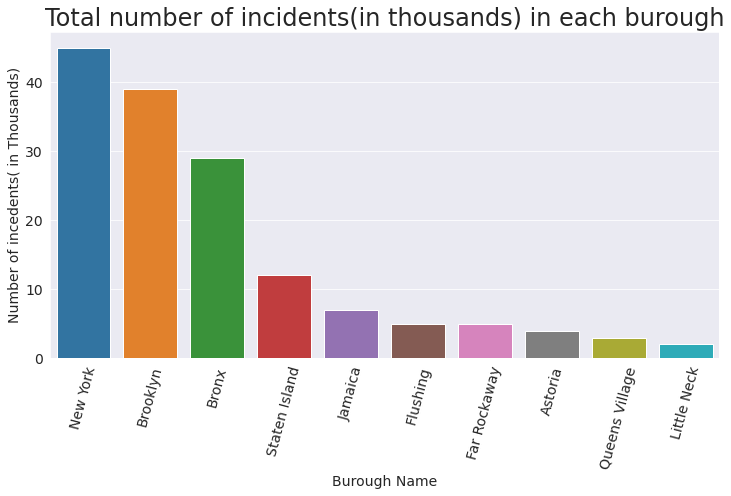

In [134]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
fig_top_10_burough=sns.barplot(x=top_10_buroughs.index,y=top_10_buroughs.values)

fig_top_10_burough.set_title('Total number of incidents(in thousands) in each burough',fontdict= { 'fontsize': 24})
fig_top_10_burough.set_xlabel('Burough Name',fontdict= { 'fontsize': 14})
fig_top_10_burough.set_ylabel('Number of incedents( in Thousands)',fontdict= { 'fontsize': 14});


New York, Brooklyn & Brox accounts most of the incidents. New York has the highest number incidents( about 46,000) over a period of 5.5 years.

### Response Time of the On Scene Units

CPU times: user 1.36 s, sys: 106 ms, total: 1.46 s
Wall time: 1.45 s


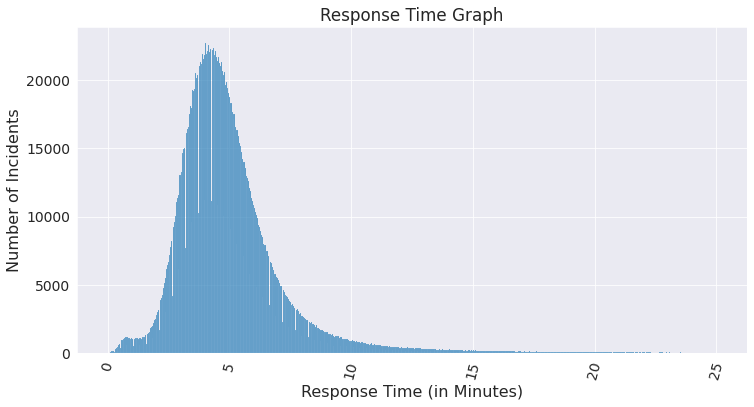

In [135]:
%%time
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Response Time Graph")
plt.xlabel=' Response Time'
plt.ylabel=' Number of incedents( in Thousands)'
fig=sns.histplot(nyc_fire_df[nyc_fire_df.ARRIVAL_DATE_TIME.notnull()],x='response_time', stat='count', binrange=(0,25) ,  )
fig.set_xlabel("Response Time (in Minutes)", fontsize=16)
fig.set_ylabel("Number of Incidents" , fontsize=16)
fig

In [136]:
nyc_fire_df.response_time.describe().round(2)

count    2456432.00
mean           5.12
std            5.70
min            0.07
25%            3.65
50%            4.58
75%            5.78
max         1434.92
Name: response_time, dtype: float64

The median response time and the average response time is about 5 min. This is very good response time, suggesting that the locations and staffing of the Fire Unit stations are adequate.

### What are the different types of incidents

In [137]:
top_incident_types_df=nyc_fire_df.INCIDENT_TYPE_DESC.value_counts(normalize=True,ascending=True)*100

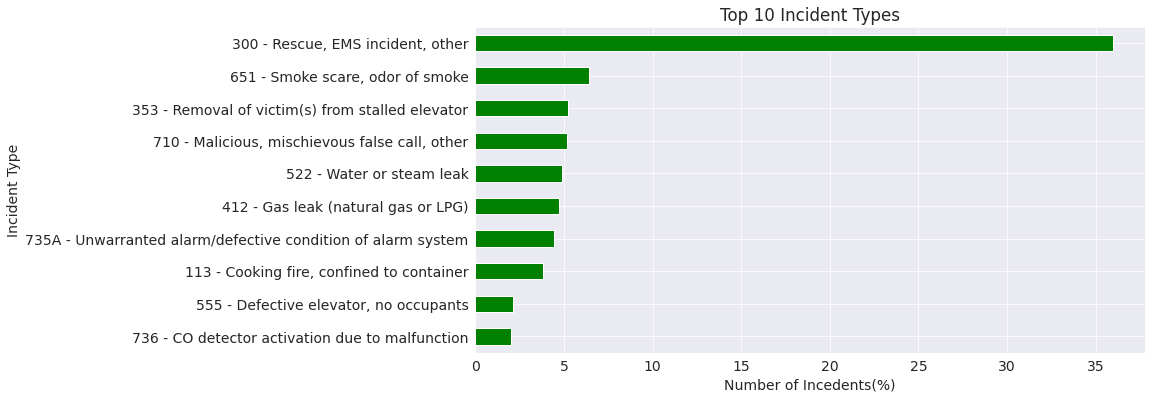

In [138]:
plt.figure(figsize=(12,6))
plt.title("Top 10 Incident Types")
incidents_fig=top_incident_types_df.tail(10).plot(kind='barh',color='green', )
incidents_fig.set_xlabel('Number of Incedents(%)', fontsize=14)
incidents_fig.set_ylabel('Incident Type', fontsize=14);

36% of the incidents are related to medical emergency. Interestingly, 5% of the calls were about people stuck in the elevators.

### Breakup of number of indicents per weekday, time of the day  & Month.

In [139]:
def getweekday(weekday):
  if weekday == 0:
    return 'Sunday'
  elif weekday == 1:
    return 'Monday'
  elif weekday == 2:
    return 'Tuesday'
  elif weekday == 3:
    return 'Wednesday'
  elif weekday == 4:
    return 'Thursday'
  elif weekday == 5:
    return 'Friday'
  elif weekday == 6:
    return 'Saturday'

def gettimeofday(hour):
  if hour>=4 and hour<12:
    return 'Morning(4AM-11:59AM)'
  elif  hour>=12 and hour<20:
    return 'Afternoon(12PM-7:59PM)'
  else:
    return 'Night(8PM-3:59AM)'
  
nyc_fire_df['weekday'],nyc_fire_df['month'],nyc_fire_df['timeofday']=nyc_fire_df.INCIDENT_DATE_TIME.dt.dayofweek.map(getweekday),nyc_fire_df.INCIDENT_DATE_TIME.dt.month,nyc_fire_df.INCIDENT_DATE_TIME.dt.hour.map(gettimeofday)

In [52]:
nyc_incidents_weekdays_df=nyc_fire_df['weekday'].value_counts()
nyc_incidents_month_df=nyc_fire_df['month'].value_counts(normalize=True,sort=False)*100
nyc_incidents_month_year_df=nyc_fire_df.INCIDENT_DATE_TIME.dt.to_period('M').value_counts(sort=False)
nyc_incidents_daytime_df=nyc_fire_df['timeofday'].value_counts(normalize=True,sort=False)*100

### Is there a difference in number of incidents based on either day of the week or month of the year? This will help in resource planning.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



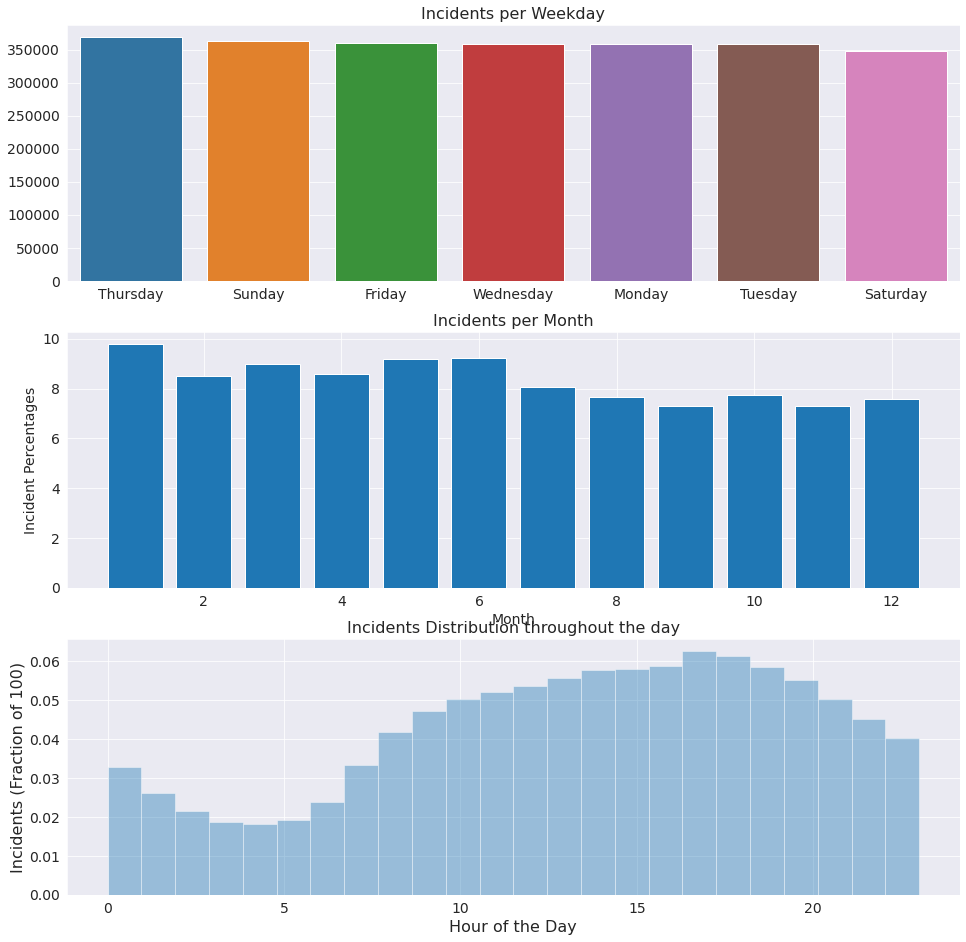

In [140]:
fig, axes = plt.subplots(3,  figsize=(16, 16))
axes[0].set_title('Incidents per Weekday',fontsize=16)
labels = nyc_incidents_weekdays_df.index
data=nyc_incidents_weekdays_df.values
colors = sns.color_palette('pastel')[0:5]
#axes[0].pie(data, labels = labels, colors = colors, autopct='%.0f%%')
sns.barplot(x=nyc_incidents_weekdays_df.index,y=nyc_incidents_weekdays_df.values,ax=axes[0]);
#Cretae Histogram to visualize number of incidents per month
axes[1].set_title('Incidents per Month',fontsize=16)
labels2 = nyc_incidents_month_df.index
data2=nyc_incidents_month_df.values
axes[1].bar(x=labels2,height=data2, )
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Incident Percentages")
#Cretae Histogram to visualize number of incidents throught the day
#axes[1,0].set_title('Incidents based on time of the day',fontsize=16)
#labels3 = nyc_incidents_daytime_df.index
#data3=nyc_incidents_daytime_df.values
#axes[1,0].bar(x=labels3,height=data3, color='g' )
#axes[1,0].set_xlabel("Time of the Day", fontsize=16)
#Cretae Distribution to visualize number of incidents throught the day
axes[2].set_title("Incidents Distribution throughout the day", fontsize=16)
sns.distplot(nyc_fire_df.INCIDENT_DATE_TIME.dt.hour,bins=24,kde=False, norm_hist=True,ax=axes[2], )
axes[2].set_xlabel("Hour of the Day", fontsize=16)
axes[2].set_ylabel("Incidents (Fraction of 100)", fontsize=16);


In [141]:
nyc_incidents_weekdays_df

Thursday     369006
Sunday       363578
Friday       360665
Wednesday    359204
Monday       359180
Tuesday      358226
Saturday     348879
Name: weekday, dtype: int64

There is no significant difference in the number of incidents reported, based on either day of the week or month of the year. However, more number of incidents are reported between 12PM and 8 PM(5PM-7PM specifically) than any other time during the day.

### Is there a general trend of the number of incidents reported over the years?

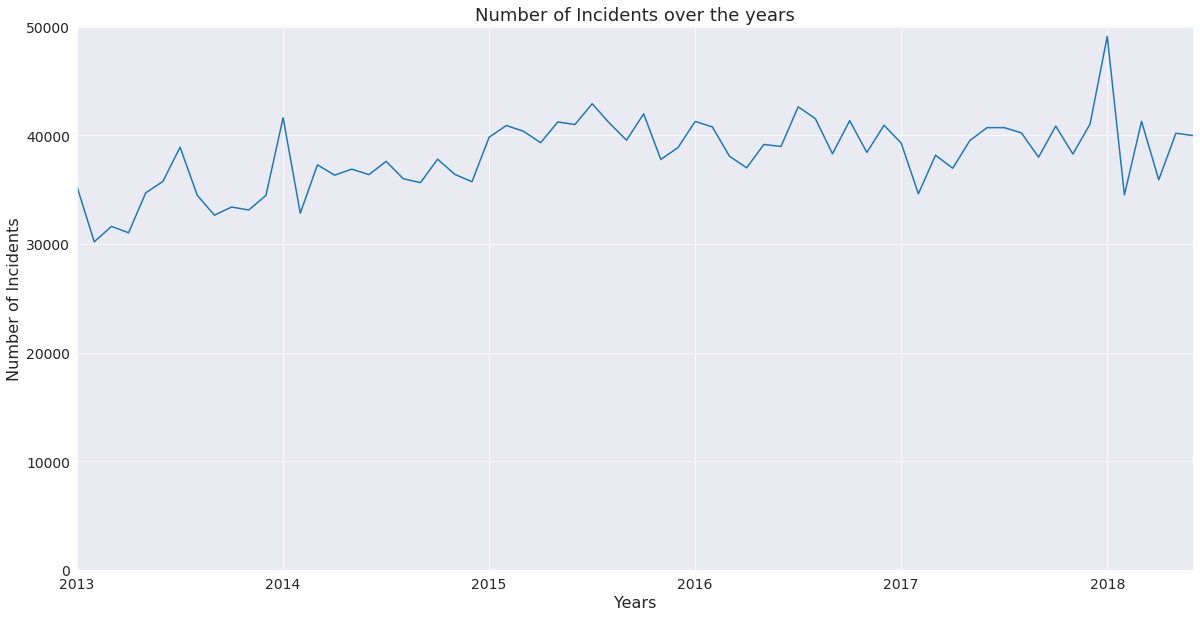

In [142]:
plt.figure(figsize=(20,10))
inc_fig=nyc_fire_df.INCIDENT_DATE_TIME.dt.to_period('M').value_counts(sort=False).plot(kind='line')
inc_fig.set_ylim(ymin=0)
inc_fig.set_xlabel("Years",fontsize=16)
inc_fig.set_ylabel("Number of Incidents",fontsize=16)
inc_fig.set_title("Number of Incidents over the years",fontsize=18);

There is no clear trend in the number of incidents reported over 5 years. January of 2018 saw a steep increase in the number of incidents compared to other months, which needs to be looked into.

### Is there any relation of number of incidents with the population of that zip code?

In [144]:
#%pylab inline
import plotly.express as px

In [145]:
nyc_incidents_zipGeo_df['POPULATION_PCT']=(nyc_incidents_zipGeo_df['POPULATION']/np.sum(nyc_incidents_zipGeo_df['POPULATION']))*100
nyc_incidents_zipGeo_df['Incidents_count_PCT']=(nyc_incidents_zipGeo_df['Incidents_count']/np.sum(nyc_incidents_zipGeo_df['Incidents_count']))*100

nyc_incidents_zipGeo_sorted_df=nyc_incidents_zipGeo_df.sort_values("POPULATION")
fig = px.line(nyc_incidents_zipGeo_sorted_df, x="zip_code", y=['POPULATION_PCT','Incidents_count_PCT'], title='Relation between Population and Incidents Percentages' , )
fig.update_yaxes()
fig.show()

Looks like there is a direct correlation with the percentage of incidents and percentage of population in any given zipcode.

## Questions and Answers

**1. How many times false alarm, incident report but fire unit did not arrive or prank calls?**

In [166]:
print("Total False alarm: " ,nyc_fire_df[nyc_fire_df.ARRIVAL_DATE_TIME.isnull()]['IM_INCIDENT_KEY'].count()+nyc_fire_df.INCIDENT_TYPE_DESC.str.contains('False alarm').sum()+nyc_fire_df.INCIDENT_TYPE_DESC.str.contains('mischievous false').sum())

false_alarm_df1=nyc_fire_df[nyc_fire_df.ARRIVAL_DATE_TIME.isnull()][['IM_INCIDENT_KEY',]]
false_alarm_df1.loc[nyc_fire_df.ARRIVAL_DATE_TIME.isnull(),'INCIDENT_TYPE_DESC']="Missing Arrival TIme"
false_alarm_df2=nyc_fire_df[nyc_fire_df.INCIDENT_TYPE_DESC.str.contains('False alarm')][['IM_INCIDENT_KEY','INCIDENT_TYPE_DESC']]
false_alarm_df3=nyc_fire_df[nyc_fire_df.INCIDENT_TYPE_DESC.str.contains('mischievous false')][['IM_INCIDENT_KEY','INCIDENT_TYPE_DESC']]
false_alarm_df=pd.concat([false_alarm_df1,false_alarm_df2,false_alarm_df3],axis=0)
false_alarm_df['INCIDENT_TYPE']='False Alarms'


false_alarm_s=false_alarm_df.INCIDENT_TYPE_DESC.value_counts()
fig3 = px.histogram(false_alarm_df,x='INCIDENT_TYPE', color="INCIDENT_TYPE_DESC", barmode='stack' ,
        )
fig3.update_layout(title="False Incidents reported",
                   autosize=False,
                   width=700,height=500,
                   xaxis_title="",
                   yaxis_title="Number of Incidents",
                   font=dict(
                        family="New Courier",
                        size=14,
                        color='black'
                           ))



Output hidden; open in https://colab.research.google.com to view.

![](https://i.imgur.com/FrV3joP.png)

In [167]:
total_false_incidents=nyc_fire_df[nyc_fire_df.ARRIVAL_DATE_TIME.isnull()]['IM_INCIDENT_KEY'].count()+nyc_fire_df.INCIDENT_TYPE_DESC.str.contains('False alarm').sum()+nyc_fire_df.INCIDENT_TYPE_DESC.str.contains('mischievous false').sum()
total_incidents=nyc_fire_df['IM_INCIDENT_KEY'].count()
print("Total Percentage of False Alarms: ", round((total_false_incidents/total_incidents)*100,2))



Total Percentage of False Alarms:  7.68


A total of 193,515 incidents which amounts to 7.7% false alarms. This includes the incident reported and units not arrived and also incident type enetered as false or mischievous alarms.

**2. Which area of the city has more number of incidents and compare it with its Population?**

In [148]:
top_5_incidents_cities_df=nyc_incidents_zipGeo_df.groupby('PO_NAME').sum('POPULATION').sort_values('POPULATION',ascending=False).head(5)

In [149]:
top_5_incidents_cities_df.reset_index(inplace=True)
fig4=px.bar(top_5_incidents_cities_df,x='PO_NAME',y=['POPULATION_PCT'	,'Incidents_count_PCT'],barmode='group')
fig4.update_layout(title=" Comparision of Population and incidents for top % burougs in New York City",
                   xaxis_title=" Burough Name", 
                   yaxis_title="Percentage of Poplulation and Incidents (%)",
                   height=700,width=1400, )
fig4.show()

Brooklyn, New york and Bronx has heightest population percentage and also number of incidents. Interestingly, New York accounts for 18% of the population, but has 25% of incidents. This colud be because of the population density as well as the demography(age) of the population.

**3. How is the response time of the on-scene units? This will help in resource planning.**

In [150]:
nyc_fire_df.response_time.describe().round(2)

count    2456432.00
mean           5.12
std            5.70
min            0.07
25%            3.65
50%            4.58
75%            5.78
max         1434.92
Name: response_time, dtype: float64

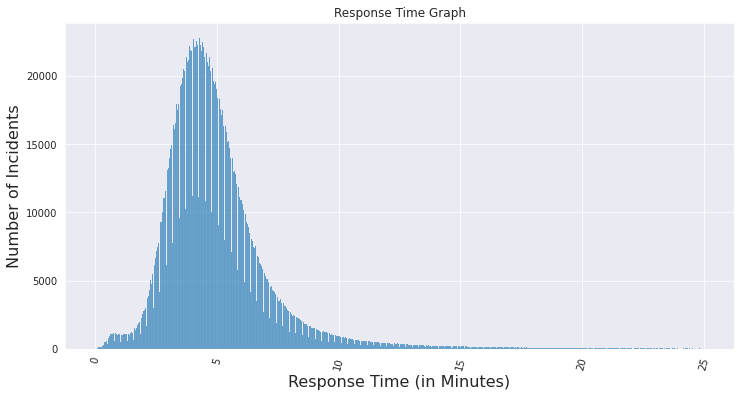

In [151]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Response Time Graph")
fig=sns.histplot(nyc_fire_df[nyc_fire_df.ARRIVAL_DATE_TIME.notnull()],x='response_time', stat='count', binrange=(0,25) ,  )
fig.set_xlabel("Response Time (in Minutes)", fontsize=16)
fig.set_ylabel("Number of Incidents" , fontsize=16)
fig;

The median response time and the average response time is about 5 min. This is very good response time, suggesting that the locations and staffing of the Fire Unit stations are adequate.

**4. Does the number of incidents has any relation with the day of the week?**

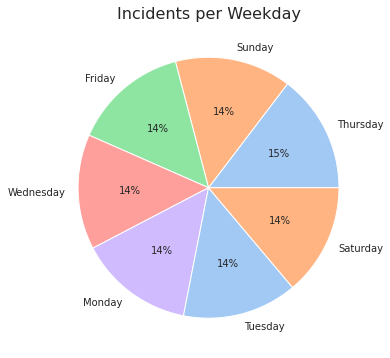

In [152]:
plt.figure(figsize=(12,6))
plt.title('Incidents per Weekday',fontsize=16)
labels = nyc_incidents_weekdays_df.index
data=nyc_incidents_weekdays_df.values
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%');

Surprisingly, the number of incidents reported(14%) are about the same on each of the weekday.

**5. Does the number of incidents has any relation with the month of the year? This will allow us to know if season has any affect on the incident reported.**

In [153]:
fig6=px.bar(x=labels2,y= data2)
fig6.update_layout(height=500,width=1000,
                   title="Month wise distribution of Incidents(%)", 
                   xaxis_title="Month",
                   yaxis_title="Incidents(%)",
                   )


Although, there is slight increase in the number of incidents reported in the month of January, but, the cases reported are more or less is uniformly distributed across different months in an year.

**6. Does the number of incidents has any relation with the time of the day? This will allow us to adequately staff during peak time.**

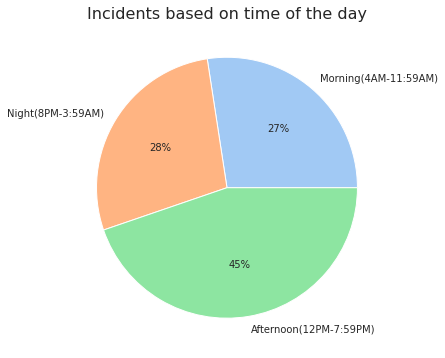

In [154]:
plt.figure(figsize=(12,6))
plt.title('Incidents based on time of the day',fontsize=16)
labels3 = nyc_incidents_daytime_df.index
data3=nyc_incidents_daytime_df.values
colors = sns.color_palette('pastel')[0:5]
plt.pie(data3, labels = labels3, colors = colors, autopct='%.0f%%');

More number of incidents are reported in the Afternoon between 12PM-8PM than any other time during the day.

**7. What are top 5 incident types?**

In [155]:
top_5_incident_type=(nyc_fire_df.INCIDENT_TYPE_DESC.value_counts(normalize=True)*100).head(5)

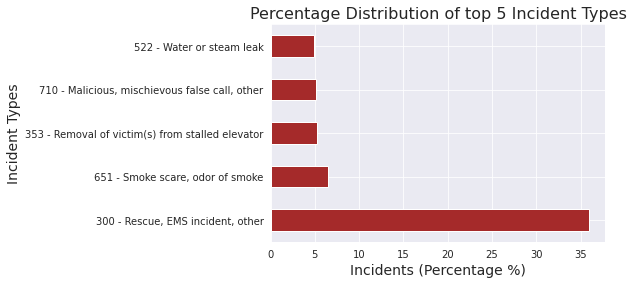

In [156]:
fig_top_5_incident_type=top_5_incident_type.plot(kind='barh',color='brown')
fig_top_5_incident_type.set_xlabel("Incidents (Percentage %)" ,fontdict={'fontsize':14})
fig_top_5_incident_type.set_ylabel("Incident Types" ,fontdict={'fontsize':14})
fig_top_5_incident_type.set_title("Percentage Distribution of top 5 Incident Types" ,fontdict={'fontsize':16});


A large number (36%) of incidents are medical related incidents suggesting a health related or a traffic related events. 5% calls are classified as mischievous calls.

**8. Is there a general trend of the number of incidents reported over the years?**

In [157]:
incidets_per_year=round(nyc_fire_df[nyc_fire_df.INCIDENT_DATE_TIME.dt.year!=2018].INCIDENT_DATE_TIME.dt.year.value_counts(normalize=True,sort=False)*100,1)

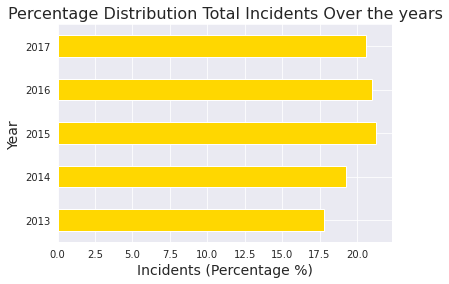

In [158]:
fig_incidets_per_year=incidets_per_year.plot(kind='barh',color='gold')
fig_incidets_per_year.set_xlabel("Incidents (Percentage %)" ,fontdict={'fontsize':14})
fig_incidets_per_year.set_ylabel("Year" ,fontdict={'fontsize':14})
fig_incidets_per_year.set_title("Percentage Distribution Total Incidents Over the years" ,fontdict={'fontsize':16});

There is no clear trend of increase in number of incidents over the years(full years). Incidents reported increased from 2013 to 2015, and then started decreasing marginally. The reasons are not clear with the data in this datasets and needs to be explored further.

**9. What is the mean time to resolve the incidents?**

In [159]:
incident_resolution=nyc_fire_df.TOTAL_INCIDENT_DURATION.describe().round(2)

In [160]:
incident_resolution

count    2518591.00
mean        1409.08
std         3220.78
min            0.00
25%          742.00
50%         1036.00
75%         1523.00
max       849842.00
Name: TOTAL_INCIDENT_DURATION, dtype: float64

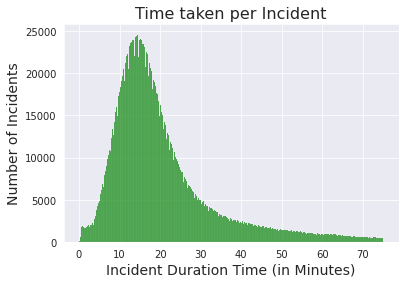

In [161]:
nyc_fire_df['TOTAL_INCIDENT_DURATION_IN_MINS']=nyc_fire_df.TOTAL_INCIDENT_DURATION/60
plt.title("")
fig8=sns.histplot(data=nyc_fire_df, x="TOTAL_INCIDENT_DURATION_IN_MINS", stat='count', binrange=(0,75) ,color='green')
fig8.set_title("Time taken per Incident", fontsize=16)
fig8.set_xlabel("Incident Duration Time (in Minutes)", fontsize=14)
fig8.set_ylabel("Number of Incidents" , fontsize=14);

The mean time that an incident lasts is 24 minutes and median is 17 mins. There are about 4% of incidents took longer than 1 hour and need to look into it.

## Summary and Conclusions.
### Summary:
We have explored and analyzed Incident Responses of Fire Department in the New York City.  
Following are some of the interesting observations :-  
* The average response time of the Fire Units is 5 minutes which is very good.
* There is no significant difference in the number of incident reported between weekdays and weekends or between different seasons in a year.
* Number of incidents reported is higher in the afternoons than in ay other time of the day.
* Fire related incidents are not very significant. However, the overwhelming type of incedents are medical.
* Only about 4% of incidents took longer than 1 hour 
### Conclusion:
Based on our analysis, the overall performance of the Fire Units are good. They may need to consider increasing the staff and resources in the Afternoons and in January month. Also, The percentage of incidents in New York burough is disproportionately higer than its population, need to look into the reasons.
### Future Work:
It will be intersting to analyze the distance travelled to get to the incident spot. This will help in identifying locations for new fire stations.  
It will be good to analyze the type of medical emergencies, action taken and also the outcome of those actions. This will help make appropriate staffing decisions.
### References:
Jovian tutorials:  
https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/interactive-visualization-with-plotly-and-folium  
https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/exploratory-data-analysis-case-study  
Kaggel Datasets:  
https://www.kaggle.com/datasets/new-york-city/nyc-incidents-responded-to-by-fire-companies/download  
https://www.kaggle.com/datasets/saidakbarp/nyc-zipcode-geodata/download  
Newyork city Dataset:  
https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip



In [165]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pramation/project-2-nyc-fire-incidents-analysis


'https://jovian.ai/pramation/project-2-nyc-fire-incidents-analysis'